In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.neighbors import KernelDensity

In [2]:
# Import data
data = np.genfromtxt('Data/TSvalues.txt')

## (A)
What is the critical value, i.e. threshold, of the test statistic that corresponds to a one-sided p-value of 4.55%?

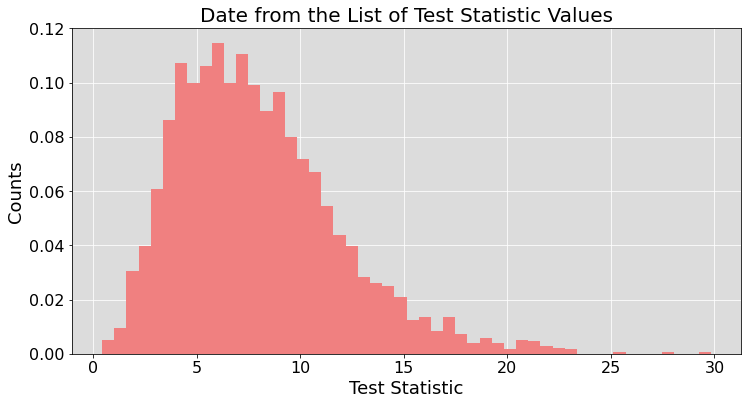

In [3]:
# Plot data
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(data, bins=50, density=True, color='lightcoral', zorder=2)

ax.set_facecolor('gainsboro')
ax.grid(color='white')

ax.set_title('Data from the List of Test Statistic Values', fontsize=20)
ax.set_ylabel('Counts', fontsize=18)
ax.set_xlabel('Test Statistic', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('Plots/3_visual.png')

plt.show()

i think the one-sided p-value is from the right. So we can sort the sample, and then reverse the array so the last is first. And then we can "integrate" it by saying how many N_above do we need until N_above/N_samples is equal to 4.55%. Then i think the critical value would be the last sample we include to let this happen.

See the illustration here: https://en.wikipedia.org/wiki/One-_and_two-tailed_tests#/media/File:P-value_Graph.png

Another consideration: should we just do it on the histogram or should we make a kernel PDF for it first

## Strictly from the histogram

In [23]:
# Define the p value we want
p_want = 0.0455

In [4]:
def compute_p_val(crit_val, sample):
    """
    crit_val = the critical val to compute p from
    sample = the data
    """
    
    return np.sum(sample >= crit_val) / len(sample)

In [93]:
# Crit vals to try
crit_arr = np.linspace(0,30,1000)

# Array to store p values
p_arr = np.zeros(len(crit_arr))

#loop over data
for i in range(len(crit_arr)):
    
    p_arr[i] = compute_p_val(crit_arr[i], data)

In [94]:
# Extract the critical value that is closest to p_want
idx = np.argmin(abs(p_arr - p_want))
crit_arr[idx], p_arr[idx], idx

(15.675675675675675, 0.04533333333333334, 522)

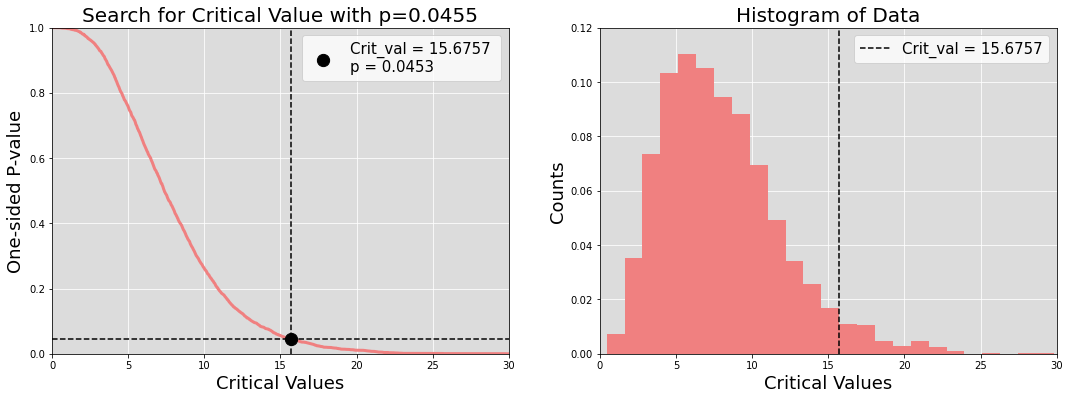

In [95]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))

# Finding it ------------
ax[0].set_facecolor('gainsboro')
ax[0].grid(color='white')

ax[0].plot(crit_arr, p_arr, color='lightcoral', linewidth=3)

ax[0].hlines(p_arr[idx], 0, 30, color='k', linestyle='dashed', zorder=4)
ax[0].vlines(crit_arr[idx], 0, 1, color='k', linestyle='dashed', zorder=4)
ax[0].scatter(crit_arr[idx], p_arr[idx], color='k', s=150, zorder=5, label=f'Crit_val = {crit_arr[idx]:.4f} \np = {p_arr[idx]:.4f}')

ax[0].set_xlabel('Critical Values', fontsize=18)
ax[0].set_ylabel('One-sided P-value', fontsize=18)
ax[0].set_title(f'Search for Critical Value with p={p_want}', fontsize=20)
ax[0].legend(prop={'size':15})

ax[0].set_xlim(0,30)
ax[0].set_ylim(0,1)

# Displaying on histogramm ----------
ax[1].set_facecolor('gainsboro')
ax[1].grid(color='white')

ax[1].hist(data, density=True, color='lightcoral', bins=25, zorder=3)
ax[1].vlines(crit_arr[idx], 0, 0.12, color='k', linestyle='dashed', zorder=4, label=f'Crit_val = {crit_arr[idx]:.4f}')
ax[1].set_xlim(0,30)
ax[1].set_ylim(0,0.12)

ax[1].set_xlabel('Critical Values', fontsize=18)
ax[1].set_ylabel('Counts', fontsize=18)
ax[1].set_title(f'Histogram of Data', fontsize=20)
ax[1].legend(prop={'size':15})

plt.savefig('Plots/3_crit_val')
plt.show()

## (B)
If the true distribution for the test statistics in the file is chisquared
distributed, does the test statistic threshold
established with the bootstrap samples match the expected
critical value from a chi-squared distribution with 5 degrees-offreedom?

In [109]:
# We define a longer xrange
x_arr = np.linspace(0,30,1000)

# Define x2 distribution (pdf)
y_arr5 = stats.chi2.pdf(x_arr,df=5)
y_arr8 = stats.chi2.pdf(x_arr,df=8)

# Crit vals to try
crit_arr_chi = np.linspace(0,50,1000)

# Get the critical value associated with p_want -------
p_arr5 = np.zeros(1000)
p_arr8 = np.zeros(1000)

# Find the p-value from integration
def compute_p_int(crit_val, y_data, step_size):
    return np.trapz(y_data[x_arr>crit_val], dx=step_size )

for i in range(len(crit_arr_chi)):
    p_arr5[i] = compute_p_int(crit_arr_chi[i], y_arr5, x_arr[1]-x_arr[0])
    p_arr8[i] = compute_p_int(crit_arr_chi[i], y_arr8, x_arr[1]-x_arr[0])
    
# Find the best matches
idx5 = np.argmin(abs(p_arr5 - p_want))
idx8 = np.argmin(abs(p_arr8 - p_want))
crit5, p5 = crit_arr_chi[idx5], p_arr5[idx5]
crit8, p8 = crit_arr_chi[idx8], p_arr8[idx8]

print(f'5dof: crit = {crit5:.2f} \t\t p = {p5:.4f}')
print(f'8dof: crit = {crit8:.2f} \t\t p = {p8:.4f}')

5dof: crit = 11.31 		 p = 0.0454
8dof: crit = 15.77 		 p = 0.0452


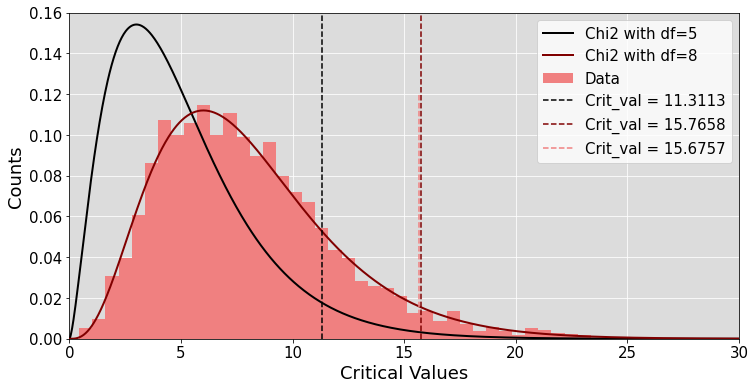

In [113]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_facecolor('gainsboro')
ax.grid(color='white')

ax.hist(data, bins=50, density=True, color='lightcoral',zorder=2, label='Data')
ax.plot(x_arr, y_arr5, linewidth=2, color='k', label='Chi2 with df=5', zorder=3)
ax.plot(x_arr, y_arr8, linewidth=2, color='maroon', label='Chi2 with df=8', zorder=3)

ax.vlines(crit5, 0, 0.16, color='k', linestyle='dashed', zorder=4, label=f'Crit_val = {crit5:.4f}')
ax.vlines(crit8, 0, 0.16, color='maroon', linestyle='dashed', zorder=4, label=f'Crit_val = {crit8:.4f}')
ax.vlines(crit_arr[idx], 0, 0.12, color='lightcoral', linestyle='dashed', zorder=4, label=f'Crit_val = {crit_arr[idx]:.4f}')

ax.set_xlabel('Critical Values', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)

plt.xlim(0,30)
plt.ylim(0,0.16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.legend(prop={'size':15})

plt.savefig('Plots/3_chi2')
plt.show()